<a href="https://colab.research.google.com/github/GitHub-Nishtha/Handwritten-Digit-Prediction/blob/main/HandwrittenDigitPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#MNIST Handwritten Dataset
import tensorflow.keras as k
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
mnist = k.datasets.mnist
(xtrain,ytrain),(xtest,ytest) = mnist.load_data()

In [ ]:
#Array of 11th sample or 10th index sample
xtrain[10] 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 118,
        219, 166, 118, 118,   6,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 103, 242, 254,
        254, 254, 254, 254,  66,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
ytrain[10]

3

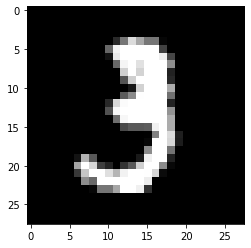

In [ ]:
plt.imshow(xtrain[10],cmap='gray')
plt.show()

In [ ]:
#Building the Neural Network model
model = k.models.Sequential()
#Adding the layers
model.add(k.layers.Flatten()) #Input Layer
model.add(k.layers.Dense(784,activation='relu')) #Hidden Layer
model.add(k.layers.Dense(10,activation='softmax')) #Output Layer
#Compiling the model
#Loss function for error and optimizer for gradient descent
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=["accuracy"])

In [ ]:
#Scaling/Normalize the data
#Originally the pixel is 0-255
#We will change it to 0-1
#This increases the accuracy
xtrain_scaled = xtrain/255
xtest_scaled = xtest/255

In [ ]:
xtrain_scaled[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
#Epochs is the number of iterations
model.fit(xtrain_scaled,ytrain,epochs=15)

Epoch 1/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1931 - accuracy: 0.9429
Epoch 2/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0759 - accuracy: 0.9764
Epoch 3/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0491 - accuracy: 0.9847
Epoch 4/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0367 - accuracy: 0.9880
Epoch 5/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0263 - accuracy: 0.9914
Epoch 6/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0200 - accuracy: 0.9937
Epoch 7/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0166 - accuracy: 0.9946
Epoch 8/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0141 - accuracy: 0.9956
Epoch 9/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0125 - accuracy: 0.9961
Epoch 10/15
1875/1875 [==============================] - 12s 6ms/step - l

In [ ]:
#Prediction for the testing samples
ypred = model.predict(xtest_scaled)

In [ ]:
ytest[10]

0

In [ ]:
#It gives a probability
#array[prob(0),prob(1),prob(2),prob(3),prob(4),prob(5)...,prob(9)]
ypred[10]

array([1.0000000e+00, 6.0306725e-25, 1.9377253e-14, 2.4370182e-27,
       2.8189357e-27, 2.3282909e-23, 1.6191825e-24, 8.6607762e-18,
       2.0120900e-28, 1.0991108e-15], dtype=float32)

In [ ]:
#Giving the output of number with maximum probability
ypred[10].argmax()

0

In [ ]:
model.evaluate(xtest_scaled,ytest)

313/313 [==============================] - 1s 4ms/step - loss: 0.0915 - accuracy: 0.9824


[0.09152322262525558, 0.9824000000953674]

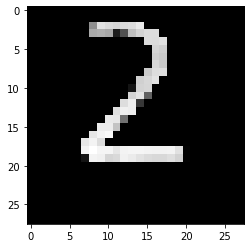

In [ ]:
#Testing a new sample
import cv2
#Converting the image to grayscale
img = cv2.imread("/content/2.png",0)
#Resize the image
img = cv2.resize(img,(28,28))
#Invert the image
img = cv2.bitwise_not(img)
#Scale for better results
img = img/255
plt.imshow(img,cmap='gray')
plt.show()

In [ ]:
model.predict(np.array([img])).argmax()

2